# Natural Langage Processing : analyse de sentiments

##  Application au clustering des critiques IMDB

On s'appuie ici sur 50000 critiques listées dans IMDB. Le but de ce notebook est de chercher à mener une classification non supervisée (_clustering_) de ces critiques puis d'utiliser les modules disponibles sur Python pour tenter d'analyser les sentiments qui se dégagent de ces critiques.

Les données ont été récoltées pour la publication _Learning Word Vectors for Sentiment Analysis_ de Maas, Andrew L., Daly, Raymond E., Pham, Peter T., Huang, Dan  et  Ng, Andrew Y.  et  Potts, Christopher (Juin 2011, _Association for Computational Linguistics_).  

Les données ont été compilées au format pickle pour faciliter l'import et un vecteur de mots peu fréquents ou très fréquents (stop_words) a été églamenet créé pour permettre la gestion de la matrice de termes. Le code pour faire cela est disponible par ailleurs.

In [1]:
import pickle
# On charge les pickles sauvegardés 
with open('dict_imdb', 'rb') as dict_imdb_file:
     imdb = pickle.load(dict_imdb_file)
        
with open('stop_words', 'rb') as stop_words_file:
     stop_words = pickle.load(stop_words_file)

In [2]:
# On définit une première fonction de nettoyage qui prend en charge les 
# choses les plus évidentes que l'on a remarquées
import re
import string
def premier_nettoyage(texte):
    texte = texte.lower() # passage en minuscules
    texte = re.sub(re.escape("\'"), " ", texte) # apostrophes 
    texte = re.sub(re.escape("<br /><br />"), " ", texte) # balise html
    texte = re.sub(re.escape("\x97"), " ", texte) # autre balise?
    texte = re.sub('[%s]' % re.escape(string.punctuation), " ", texte) # on enlève la ponctuation 
    texte = re.sub("[0-9]", " ", texte) # On enlève les chiffres
    return(texte)

On peut regarder après ce premier tour de nettoyage si on repère encore quelque chose à l'oeil et rajouter des étapes à notre fonction.  
Pour commencer, on transforme notre dictionnaire en dataframe : 

In [3]:
# On transforme notre dictionnaire en dataframes
import pandas as pd
df_imdb = pd.DataFrame.from_dict(imdb, orient = 'index')
df_imdb.columns = ["critique"]
df_imdb

,critique
0,"I admit, the great majority of films released ..."
1,"Take a low budget, inexperienced actors doubli..."
2,"Everybody has seen 'Back To The Future,' right..."
3,Doris Day was an icon of beauty in singing and...
4,"After a series of silly, fun-loving movies, 19..."
...,...
49995,"Delightfully awful! Made by David Giancola, a ..."
49996,"Watching Time Chasers, it obvious that it was ..."
49997,At the beginning we can see members of Troma t...
49998,"The movie was incredible, ever since I saw it ..."


On applique ensuite la fonction sur toutes les lignes : 

In [4]:
df_imdb = pd.DataFrame(df_imdb.critique.apply(lambda x: premier_nettoyage(x)))

# on regarde quelques textes au hasard :
df_imdb.iloc[5, 0]

'this isn t exactly a musical  but it almost seems like one because there more singing than much else  but this is obviously one of the hooks  basically one day in a bar that she used to work in  ruth etting  doris day  met producer martin snyder  oscar nominated james cagney  who could promise a new and better paid career on stage  she doesn t get in to it immediately as she is on for a few seconds  but she soon gets the chance for longer shows  she enjoys herself and the critics and producers are throwing offers at her  later  after marriage ruth and martin get even bigger and she has become one of the most successful women on stage  and her career soon comes to hollywood  it is only she discovers an old friend  near love  is working on the film  johnny alderman  cameron mitchell  that things go a bit pear shaped for her and the marriage relationship with martin  also starring robert keith as bernard v  loomis  tom tully as frobisher and harry bellaver as georgie  it won the oscar fo

On ne voit rien de choquant jusque là, on va de toute façon vite voir avec la matrice de termes!

In [5]:
# Matrice de termes
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = list(stop_words))
 
# On fit_transform 
imdb_cv = cv.fit_transform(df_imdb.critique)
imdb_dtm = pd.DataFrame(imdb_cv.toarray(),
                        columns = cv.get_feature_names_out(),
                        index = df_imdb.index)

imdb_dtm

,acting,action,actor,actors,actually,american,audience,away,bad,based,...,wife,woman,won,work,world,worth,written,year,years,young
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
49996,1,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
49997,1,0,0,0,0,0,0,1,3,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


Fréquence des mots les plus utilisés : 

In [6]:
imdb_dtm.apply(sum, axis = 0).sort_values(ascending = False)[0:50]

movie         88202
film          81099
like          40717
just          35822
good          29743
time          25121
story         23589
really        23191
bad           19070
people        18598
great         18392
don           17564
make          16494
way           16065
movies        15469
characters    14687
character     14360
films         14280
think         13999
watch         13768
plot          13357
love          13007
seen          12936
little        12829
life          12803
acting        12667
best          12652
did           12519
know          12293
does          11798
better        11792
man           11620
end           11194
scene         11173
scenes        10688
say           10294
ve            10027
real           9751
doesn          9073
watching       9031
thing          9022
director       8974
funny          8923
years          8859
didn           8829
actors         8783
new            8720
going          8668
old            8662
makes          8614


## Analyse de sentiments  

Sur Python, le module textblob a été développé avec des linguistes qui ont manuellement noté le degré de subjectivité et de positivité de chacun des termes de la langue anglaise. Les deux objets sont :  
- TextBlob(x).sentiment.subjectivity qui note de 0 à 1 le degré de subjectivité (1 = très subjectif).  
- TextBlob(x).sentiment.polarity qui note de -1 à 1 le degré de positivité (1 = très positif).   
On peut calculer cela sur un ensemble de chaînes de caractère comme la moyenne de ces degrés pour chacun des termes de la chaîne de caractère. Concrètement on peut donc ajouter deux variables à notre dataframe : 

In [11]:
from textblob import TextBlob
carac = "it's very good"
TextBlob(carac).sentiment.polarity, TextBlob(carac).sentiment.subjectivity

(0.9099999999999999, 0.7800000000000001)

In [8]:
from textblob import TextBlob

pos = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_imdb['positivite'] = df_imdb.critique.apply(pos)
df_imdb['subjectivite'] = df_imdb.critique.apply(sub)
df_imdb[["positivite", "subjectivite"]]

,positivite,subjectivite
0,0.187130,0.432222
1,0.056217,0.619356
2,0.028885,0.407111
3,0.081845,0.490476
4,0.120985,0.563144
...,...,...
49995,0.255861,0.497731
49996,-0.411458,0.543750
49997,0.015517,0.562069
49998,0.308730,0.600397


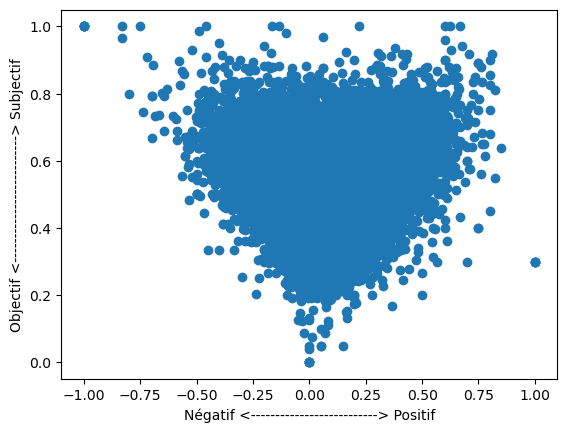

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df_imdb['positivite'], df_imdb['subjectivite'])  
plt.xlabel("Négatif <--------------------------> Positif")
plt.ylabel("Objectif <--------------------------> Subjectif");

On peut voir si le modèle est cohérent ou pas : 

In [10]:
# on affiche les commentaires plutôt positifs : 
df_imdb.loc[df_imdb.positivite >= 0.75, :].critique.values

array(['robin hood  elizabeth and essex  they died with their boots on    add these to this movie  and you have a great combination  errol flynn was always so handsome and charming  wish he could have lived forever  it is so wonderful that his images can be preserved in these excellent films  yes  don juan was the great lover  he also had to be a great politician  what with dealing with kings  courtiers and husbands  if i were a movie director  and could get errol flynn to act for me in a leading man role  i know i could get a great performance out of him every time  rip  errol  you were the best       ',
       'who dve thought california kirsten could do period so nicely  she was gorgeous in this  who was the boy s father  he was really good  what an awesome period piece and just beautiful costumes  i also thought geraldine james was wonderful ',
       'i thought stardom was a very good comedy drama  jessica pare did an excellent job and she is very beautiful in this part  the movie

In [11]:
# on affiche les commentaires plutôt négatifs : 
df_imdb.loc[df_imdb.positivite <= -0.75, :].critique.values

array(['this is one of the worst movies i´ve ever seen  avoid it if you can ',
       'this was so awful that not even tom servo  crow  or mike could make this watchable  what were they thinking    out of     should be zero ',
       'jack ryan iii confirms why he can t be a james bond for the nineties   he s just too boring  although ford does try his hardest ',
       'boy dies  boy s brain is implanted      into animatronic dinosaur  animatronic dinosaur w  boy s brain seeks revenge  and that s not even the worst part   denise richards is the lead  oh god my eyes  it hurts  it hurts  and yet i cannot look away ',
       'this was the worst movie i have ever seen  bar none  and i ve seen some honkers  i cannot conceive of how or why it was made  it was pathetically acted  painfully scripted  and all around stupid ',
       'look  the frogs didn t do jack even in the end  they should have called this movie  swampies  what a piece of crap ',
       'my friend went out to the moviestore

In [12]:
# on affiche les commentaires plutôt objectifs : 
df_imdb.loc[df_imdb.subjectivite <= 0.1, :].critique.values

array(['in the opening sequence  about       minutes into the movie when the director of photography credit is on   both the lambo and the police car are driving down a   lane road in the left lane for no apparent reason  soon after  a car passes them going the opposite direction and therefore also driving in the left lane  has anyone else noticed this  i ve rolled back through this a number of times  i can t see anything based on the plot or even based on filming requirements that would explain the reason for running on the left side  also  i wondered if maybe this was filmed outside of the us  but i don t see any reference to overseas filming locations ',
       'any feature that has to pad out its barely hour length with unrelated bump n grind footage has really got problems  there s no pace  no acting  no talent  no interest  the vampire looks like a member of the   s band whitesnake  the cult appeal of cameo appearances by plan   actors conrad brooks and dolores fuller is totally 

In [13]:
# on affiche les commentaires plutôt subjectifs : 
df_imdb.loc[df_imdb.subjectivite >= 0.8, :].critique.values

array(['this film is a perfect adaptation of paco ibáñez characters  mortadelo  filemon  professor bacterio  the super  ofelia  rompeteños  people from rue    percebe are perfectly represented  story and development take all the topics of the comic  pepe viyuela and benito pocino are credible and incredible as the worst couple of secret agent in the history of t i a ',
       'this show rocked  it had something for everyone  love  hate  lust  magic  good  evil you name it  it was in there  it was the kind of thing that appeals to anyone who watches it  as it had the perfect balance between the supernatural and the natural  with great story lines between each of the characters  each of the characters were typical sex driven teenagers  but they were being driven into a world of magic without realising it  and it was done in a painfully addictive way  this said  the adults in the show also played an important part  and without them  jez  azazeal etc  the show wouldn t have worked  there s

In [14]:
# subjectifs - neutres
df_imdb.loc[(df_imdb.subjectivite >= 0.8) & (df_imdb.positivite == 0), :].critique.values

array(['this is the only movie that i have literally walked out of for sheer boredom  needless to say  i won t be revealing the end of the story here  robert duvall puts in a stunning performance  however  the storyline has none of the duvall s depth and simply unfolds  or perhaps unravels  in a meandering and uninteresting sequence   '],
      dtype=object)

### En français
Pour info, possibilité d'analyser des sentiments en français avec cette syntaxe (après `pip install textblob-fr`) : 

```python
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer
text = u"C'est super"
blob = TextBlob(text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
blob.sentiment #polarité en premier, subjectivité en second
```

## Petits compléments Textblob

La libraire `textblob` construite à partir de `nltk` (Natural Langage ToolKit) permet bien d'autres choses que l'analyse de sentiments. Comme dit Thomas, [*rtfm*](https://textblob.readthedocs.io/en/dev/).

In [12]:
from textblob import TextBlob

### Tokenisation

In [16]:
blob = TextBlob("""I felt really happy to use this amazing library.
                   You are playing better than me.
                   Einstein didn't speak until he was four years old.
                   He spoke at four years old.""")

In [17]:
blob.sentences

[Sentence("I felt really happy to use this amazing library."),
 Sentence("You are playing better than me."),
 Sentence("Einstein didn't speak until he was four years old."),
 Sentence("He spoke at four years old.")]

In [18]:
blob.words

WordList(['I', 'felt', 'really', 'happy', 'to', 'use', 'this', 'amazing', 'library', 'You', 'are', 'playing', 'better', 'than', 'me', 'Einstein', 'did', "n't", 'speak', 'until', 'he', 'was', 'four', 'years', 'old', 'He', 'spoke', 'at', 'four', 'years', 'old'])

In [19]:
blob.sentiment

Sentiment(polarity=0.42000000000000004, subjectivity=0.56)

In [20]:
[s.sentiment for s in blob.sentences]

[Sentiment(polarity=0.7000000000000001, subjectivity=0.95),
 Sentiment(polarity=0.5, subjectivity=0.5),
 Sentiment(polarity=0.1, subjectivity=0.2),
 Sentiment(polarity=0.1, subjectivity=0.2)]

In [21]:
#import nltk
#nltk.download('brown')
blob.noun_phrases

WordList(['amazing library', 'einstein'])

### Inflexion et lemmatisation

In [22]:
#import nltk
#nltk.download('omw-1.4')
df_lemm = pd.DataFrame()
df_lemm['mots'] = blob.words
df_lemm['singuliers'] = blob.words.singularize()
df_lemm['pluriels'] = blob.words.pluralize()
df_lemm['noms'] = [w.lemmatize("n") for w in blob.words]
df_lemm['adjectifs'] = [w.lemmatize("a") for w in blob.words]
df_lemm['verbes'] = [w.lemmatize("v") for w in blob.words]
df_lemm['adverbes'] = [w.lemmatize("r") for w in blob.words]

pd.options.display.max_columns = 50
df_lemm.transpose().iloc[:,:14]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
mots,I,felt,really,happy,to,use,this,amazing,library,You,are,playing,better,than
singuliers,I,felt,really,happy,to,use,thi,amazing,library,You,are,playing,better,than
pluriels,we,felts,reallies,happies,toes,uses,these,amazings,libraries,Yous,ares,playings,betters,thans
noms,I,felt,really,happy,to,use,this,amazing,library,You,are,playing,better,than
adjectifs,I,felt,really,happy,to,use,this,amazing,library,You,are,playing,good,than
verbes,I,felt,really,happy,to,use,this,amaze,library,You,be,play,better,than
adverbes,I,felt,really,happy,to,use,this,amazing,library,You,are,playing,well,than


In [23]:
df_lemm.transpose().iloc[:,15:]

,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
mots,Einstein,did,n't,speak,until,he,was,four,years,old,He,spoke,at,four,years,old
singuliers,Einstein,did,n't,speak,until,he,wa,fmy,year,old,He,spoke,at,fmy,year,old
pluriels,Einsteins,dids,n'ts,speaks,untils,they,wass,fours,yearss,olds,Hes,spokes,ats,fours,yearss,olds
noms,Einstein,did,n't,speak,until,he,wa,four,year,old,He,spoke,at,four,year,old
adjectifs,Einstein,did,n't,speak,until,he,was,four,years,old,He,spoke,at,four,years,old
verbes,Einstein,do,n't,speak,until,he,be,four,years,old,He,speak,at,four,years,old
adverbes,Einstein,did,n't,speak,until,he,was,four,years,old,He,spoke,at,four,years,old
